In [ ]:
#구글 드라이브 마운트
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
#코랩 GPU확인
import tensorflow as tf
device_name = tf.test.gpu_device_name()
if device_name != '/device:GPU:0':
  raise SystemError('GPU device not found')
print('Found GPU at: {}'.format(device_name))

Found GPU at: /device:GPU:0


In [ ]:
import os #파일경로 불러오기용
import cv2 #이미지 처리용
from google.colab.patches import cv2_imshow #cv2 이미지 보여주기 함수 코랩 패치버전
import pandas as pd #데이터 프레임 조작용

In [ ]:
def create_df(data_path):
    """
   		이미지데이터의 경로와 label데이터로 데이터프레임 만들기 
    """
    df = pd.DataFrame({})
    data_dir_list = os.listdir(data_path)
    print(data_dir_list)
    for i in range(len(data_dir_list)):
      file_list = os.listdir(data_path + "/" + data_dir_list[i])
      img_path_list = []
      for j in range(len(file_list)):
        img_path = data_path + "/" + data_dir_list[i] + "/" +file_list[j]
        img_path_list.append(img_path)
      df = pd.concat([df,pd.DataFrame({'File_path':img_path_list,'Label':data_dir_list[i]})])
      print(data_dir_list[i],len(file_list))

    # index 재설정
    df = df.sample(frac=1,random_state=0).reset_index(drop = True)
    return df

In [ ]:
df = create_df('/content/drive/MyDrive/PDC_2022/test/natural_images')

['airplane', 'car', 'dog', 'flower', 'cat', 'motorbike', 'fruit', 'person']
airplane 727
car 968
dog 702
flower 843
cat 885
motorbike 788
fruit 1000
person 986


In [ ]:
display(df)

,File_path,Label
0,/content/drive/MyDrive/PDC_2022/test/natural_i...,person
1,/content/drive/MyDrive/PDC_2022/test/natural_i...,flower
2,/content/drive/MyDrive/PDC_2022/test/natural_i...,dog
3,/content/drive/MyDrive/PDC_2022/test/natural_i...,motorbike
4,/content/drive/MyDrive/PDC_2022/test/natural_i...,flower
...,...,...
6894,/content/drive/MyDrive/PDC_2022/test/natural_i...,fruit
6895,/content/drive/MyDrive/PDC_2022/test/natural_i...,cat
6896,/content/drive/MyDrive/PDC_2022/test/natural_i...,car
6897,/content/drive/MyDrive/PDC_2022/test/natural_i...,flower


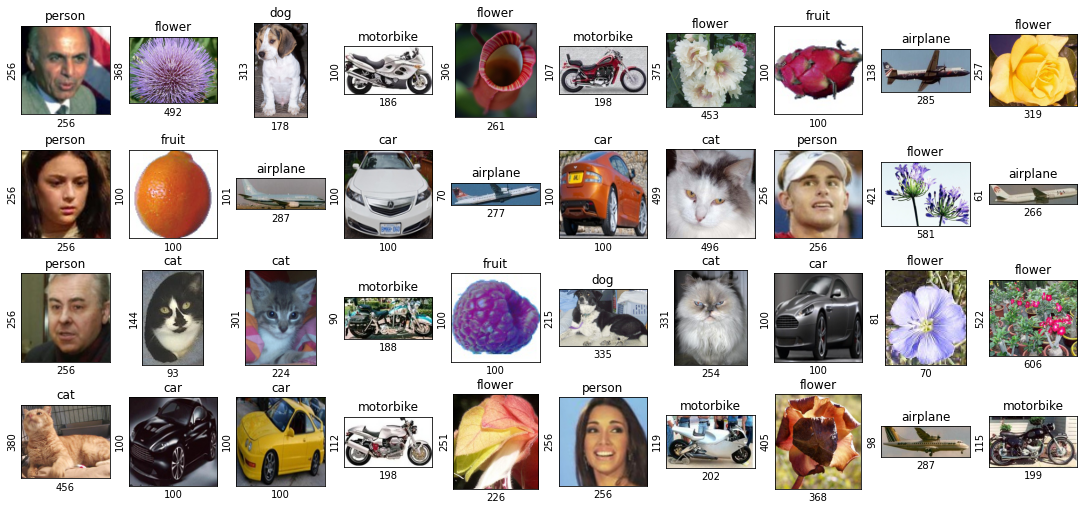

In [ ]:
import matplotlib.pyplot as plt
"""
  데이터 확인(이미지 라벨, 가로크기,세로크기)
"""
fig, axes = plt.subplots(nrows=4, ncols=10, figsize=(15, 7),
                        subplot_kw={'xticks': [], 'yticks': []})

for i, ax in enumerate(axes.flat):
    ax.imshow(plt.imread(df.File_path[i]))
    img = cv2.imread(df.File_path[i])
    ax.set_title(df.Label[i], fontsize = 12)
    ax.set_xlabel(img.shape[1], fontsize=10)
    ax.set_ylabel(img.shape[0], fontsize=10)
plt.tight_layout(pad=0.5)
plt.show()